# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [6]:
%pip install sounddevice
%pip install python_speech_features==0.4
%pip install python-time
%pip install xgboost
#installation des modules ici à cause de problème de reconnaissance des modules installé par jupyter

arrow==1.2.2
bcrypt==3.2.0
Bottleneck @ file:///C:/ci/bottleneck_1607557040328/work
category-encoders @ file:///home/conda/feedstock_root/build_artifacts/category_encoders_1634149558143/work/dist
certifi==2021.10.8
cffi==1.15.0
click==8.0.3
colorama==0.4.4
cycler==0.11.0
Flask==2.0.2
fonttools==4.28.5
greenlet==1.1.2
itsdangerous==2.0.1
Jinja2==3.0.3
joblib @ file:///tmp/build/80754af9/joblib_1635411271373/work
kiwisolver==1.3.2
MarkupSafe==2.0.1
matplotlib==3.5.1
mkl-fft==1.3.1
mkl-random @ file:///C:/ci/mkl_random_1626186184308/work
mkl-service==2.4.0
mysql==0.0.3
mysql-connector-python==8.0.27
mysqlclient==2.1.0
numexpr @ file:///C:/ci/numexpr_1640704337920/work
numpy @ file:///C:/ci_310/numpy_and_numpy_base_1643798589088/work
packaging @ file:///tmp/build/80754af9/packaging_1637314298585/work
pandas @ file:///C:/ci/pandas_1641443174429/work
patsy==0.5.2
Pillow==8.4.0
protobuf==3.19.1
psycopg2==2.9.3
pycparser==2.21
PyMySQL==1.0.2
pyparsing==3.0.6
python-dateutil @ file:///tmp/build

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
import tools
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

### Collection 

In [2]:
tools.collection()

Attention, l'enregistrement commence dans :
5


KeyboardInterrupt: 

#### 1. Importer votre DataSet

In [3]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [4]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,11.788631,-16.359291,-5.305435,-2.742673,0.122034,-11.489636,1.729240,-0.368504,-1.140815,3.946925,1.180198,-2.218794,0.0
1,10.277986,-18.249296,-7.360903,-7.438587,-2.658713,-10.362079,3.812200,5.212079,3.610327,3.677641,1.727231,-2.177583,1.0
2,9.861422,-18.327156,-7.067978,-4.895262,1.368982,-8.132614,2.108732,1.000987,-0.511337,-1.413976,-3.729602,-3.798308,2.0
3,10.744973,-18.308318,-7.505714,-4.342662,-1.505847,-12.618893,1.438810,0.270100,0.822993,4.513717,0.611395,-1.465829,3.0
4,10.231005,-19.053782,-13.855039,-7.693555,-0.819005,-13.336552,3.735674,2.820820,-0.617118,1.998671,-0.576335,0.154516,4.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [5]:
print(mydata.dtypes)
print(mydata.isna().sum())

Fe1       float64
Fe2       float64
Fe3       float64
Fe4       float64
Fe5       float64
Fe6       float64
Fe7       float64
Fe8       float64
Fe9       float64
Fe10      float64
Fe11      float64
Fe12      float64
Target    float64
dtype: object
Fe1       0
Fe2       0
Fe3       0
Fe4       0
Fe5       0
Fe6       0
Fe7       0
Fe8       0
Fe9       0
Fe10      0
Fe11      0
Fe12      0
Target    0
dtype: int64


#### 3. Visualiser les targets

In [6]:
print(mydata['Target'])

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
215    5.0
216    6.0
217    7.0
218    8.0
219    9.0
Name: Target, Length: 220, dtype: float64


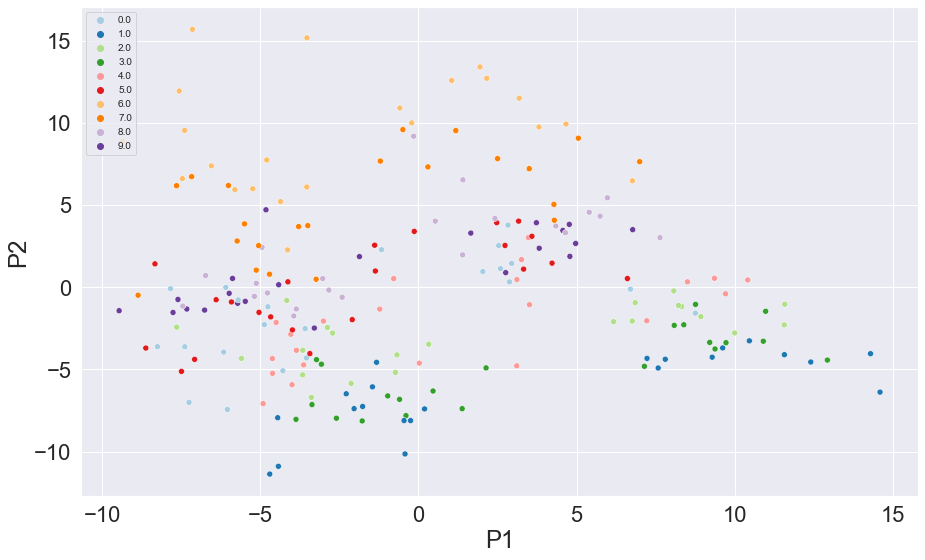

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.legend(loc=2, prop={'size': 10})
plt.show()

#### 4. Notre variable target (Y) est 'Target', Récuprer X et y à partir du jeu de données 

In [8]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(220, 12)

In [29]:
X

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12
0,11.788631,-16.359291,-5.305435,-2.742673,0.122034,-11.489636,1.729240,-0.368504,-1.140815,3.946925,1.180198,-2.218794
1,10.277986,-18.249296,-7.360903,-7.438587,-2.658713,-10.362079,3.812200,5.212079,3.610327,3.677641,1.727231,-2.177583
2,9.861422,-18.327156,-7.067978,-4.895262,1.368982,-8.132614,2.108732,1.000987,-0.511337,-1.413976,-3.729602,-3.798308
3,10.744973,-18.308318,-7.505714,-4.342662,-1.505847,-12.618893,1.438810,0.270100,0.822993,4.513717,0.611395,-1.465829
4,10.231005,-19.053782,-13.855039,-7.693555,-0.819005,-13.336552,3.735674,2.820820,-0.617118,1.998671,-0.576335,0.154516
5,11.811882,-16.779098,-12.692284,-4.670553,2.074012,-10.841630,5.725841,3.325279,-0.679501,3.796768,0.421337,-1.817095
6,13.108391,-21.239710,-17.837301,2.024332,2.185303,-13.679559,11.239795,-0.769323,-7.735896,5.347749,-1.547781,-3.750500
7,10.851043,-21.134159,-12.566028,-4.885517,-0.878849,-11.311193,6.362172,-0.439546,-5.339285,1.820249,1.148535,0.235666
8,11.200126,-20.472110,-9.113189,-4.415694,1.556509,-8.104012,4.269579,-1.551227,-4.202313,1.241635,-0.837014,-2.862748
9,10.638314,-18.595680,-15.069951,-6.050894,1.172582,-10.215118,7.391849,1.309748,-2.727706,2.933197,-0.470301,-1.861068


#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(X_train, X_test, y_train, y_test)

         Fe1        Fe2        Fe3       Fe4       Fe5        Fe6       Fe7  \
5  11.811882 -16.779098 -12.692284 -4.670553  2.074012 -10.841630  5.725841   
4  10.231005 -19.053782 -13.855039 -7.693555 -0.819005 -13.336552  3.735674   
2   9.861422 -18.327156  -7.067978 -4.895262  1.368982  -8.132614  2.108732   
9  10.638314 -18.595680 -15.069951 -6.050894  1.172582 -10.215118  7.391849   
8  11.200126 -20.472110  -9.113189 -4.415694  1.556509  -8.104012  4.269579   
0  11.788631 -16.359291  -5.305435 -2.742673  0.122034 -11.489636  1.729240   
7  10.851043 -21.134159 -12.566028 -4.885517 -0.878849 -11.311193  6.362172   
3  10.744973 -18.308318  -7.505714 -4.342662 -1.505847 -12.618893  1.438810   

        Fe8       Fe9      Fe10      Fe11      Fe12  
5  3.325279 -0.679501  3.796768  0.421337 -1.817095  
4  2.820820 -0.617118  1.998671 -0.576335  0.154516  
2  1.000987 -0.511337 -1.413976 -3.729602 -3.798308  
9  1.309748 -2.727706  2.933197 -0.470301 -1.861068  
8 -1.551227 -4.202

#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [10]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.fit(X_test))

StandardScaler()
StandardScaler()


#### 7. Développer votre meilleur modèle de classification

In [12]:
model_name = ['svc', 'knn', 'decision_tree', 'random_forest', 'boost', 'XGB', 'MLP']
pipelines = [
             Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
             Pipeline([('scaler', StandardScaler()), ('knn',  KNeighborsClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('decision_tree', DecisionTreeClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('boost', GradientBoostingClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())])]

parameters =[{'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}, 
            {'knn__n_neighbors': np.arange(1, 10), 
              'knn__metric':["euclidean", "minkowski", "manhattan"]},
             {},
             {'forest__n_estimators': np.arange(100, 125)},
             {'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3]},
             {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},
             {'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu']}]
score = []
best_param = []
for model, p, name in zip(pipelines, parameters, model_name):
        exp = GridSearchCV(model, param_grid = p)
        exp.fit(X_train, y_train)
        score.append([name, exp.score(X_test, y_test), exp.best_params_])

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'boost__exponential' not supported. 

  warnings.warn("Estimator fit failed. The score

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'boost__exponential' not supported. 

  warnings.warn("Estimator fit failed. The score

C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWa

C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWa

C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWa

C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWa

C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWa

C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWa

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\lib\site-packages

In [14]:
#print(score)
score_pur = []
for i in range (len(score)):
    score_pur.append(score[i][1])
#print(score_pur)
score_pur=sorted(score_pur)
score_trie = []
for i in range (len(score_pur)):
    for j in range (len(score)):
        if score_pur[i] == score[j][1]:
            score_trie.append(score[j])
print(score_trie[-1])

['random_forest', 0.9318181818181818, {'forest__n_estimators': 103}]


In [15]:
import joblib
joblib.dump(MLPClassifier(activation='identity', hidden_layer_sizes = (150,)) , 'model_MLP')

['model_MLP']

# Application en Temps Réel

In [16]:
from Tools.tools import rec
from Tools.tools import collection

In [17]:
m_jlib = joblib.load('model_MLP')
m_jlib.fit(X_train, y_train)

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(150,))

In [18]:
rec(scaler, m_jlib)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 
------------------
Digit :  2.0
------------------
